# Creater : Karan Dave                                                       

# Task : 1 (Supervised ML )

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

#  Reading Dataset

In [2]:
url = "http://bit.ly/w-data"
Data=pd.read_csv(url)
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
Data.dtypes

Hours     float64
Scores      int64
dtype: object

# Data Visualization

<Figure size 1296x576 with 0 Axes>

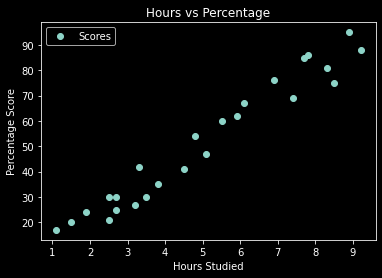

In [5]:
plt.figure(figsize=(18,8))
plt.style.use("dark_background")
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

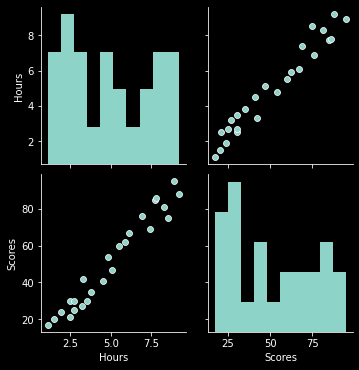

In [6]:
sns.pairplot(Data)

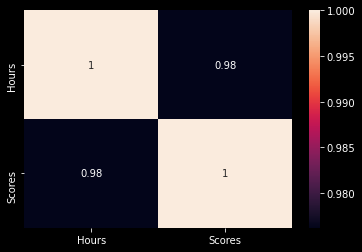

In [7]:
sns.heatmap(Data.corr(),annot=True)

#  Data Spliting & Model Training

In [8]:
x=Data.iloc[:, :-1]
y=Data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [9]:
Classifier = LinearRegression()
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
print('Accuracy Score:',Classifier.score(X_test, y_test)*100)

Accuracy Score: 94.54906892105355


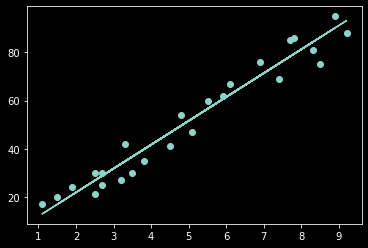

In [10]:
# Plotting the regression line
line = Classifier.coef_*x+Classifier.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

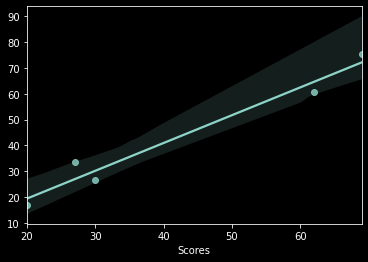

In [11]:
# Plotting for the Actual data VS Predicated data
sns.regplot(y_test,y_pred)

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [13]:
# prediction of score if a student studies for 9.25 hrs/ day.
hours = 9.25
my_pred = Classifier.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# Evaluating the model 

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
